### Grafiquemos el error de $ \frac{|S(x,N) - e^{x} |}{e^x}$ hasta un N = 60

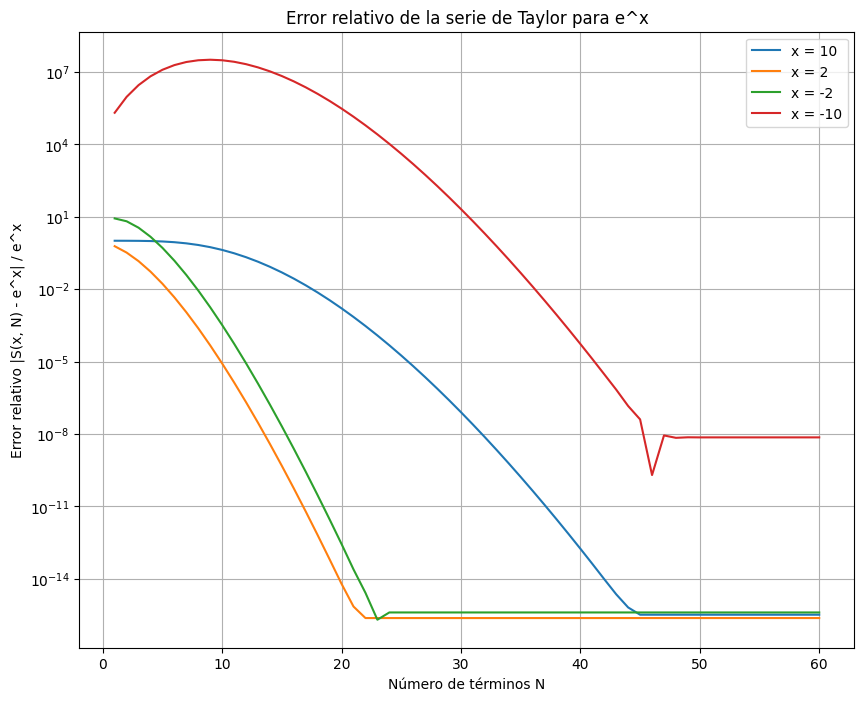

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math
# Función para calcular la serie de Taylor de e^x con N+1 términos
def taylor_exp(x, N):
    S = 0
    for i in range(N + 1):
        S += x**i / math.factorial(i)
    return S

# Función para calcular el error relativo
def relative_error(x, N):
    exact_value = np.exp(x)
    taylor_value = taylor_exp(x, N)
    error = abs(taylor_value - exact_value) / exact_value
    return error

# Valores de N (número de términos)
N_values = range(1, 61)

# Valores de x para probar
x_values = [10, 2, -2, -10]

# Gráficas de error relativo para cada valor de x
plt.figure(figsize=(10, 8))

for x in x_values:
    errors = [relative_error(x, N) for N in N_values]
    plt.plot(N_values, errors, label=f"x = {x}")

plt.yscale("log")  # Escala logarítmica para ver mejor el error
plt.xlabel("Número de términos N")
plt.ylabel("Error relativo |S(x, N) - e^x| / e^x")
plt.title("Error relativo de la serie de Taylor para e^x")
plt.legend()
plt.grid(True)
plt.show()


- Tenemos que para valores negativos, se demora mas en converger.
- Podemos apreciar que entre mas terminos calculemos nuestro error disminuye.

### Grafiquemos el error ahora usando la expresión $e^x = \frac{1}{e^- x}$ para x<0

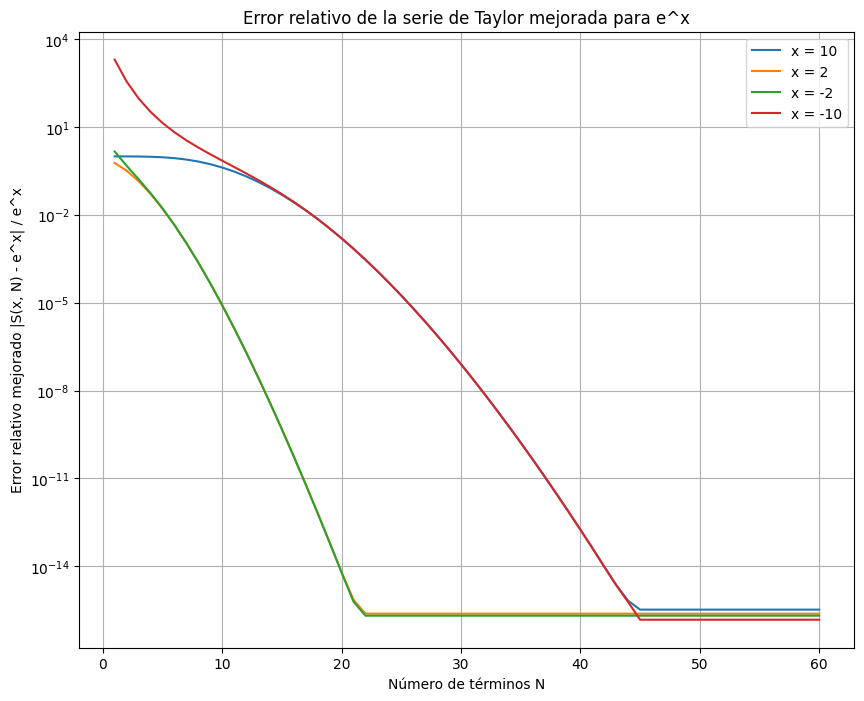

In [3]:
# Función para calcular la serie de Taylor usando la identidad para x < 0
def taylor_exp_improved(x, N):
    if x >= 0:
        return taylor_exp(x, N)
    else:
        # Usar la identidad e^x = 1 / e^(-x) para x < 0
        return 1 / taylor_exp(-x, N)

# Función para calcular el error relativo usando la técnica mejorada
def relative_error_improved(x, N):
    exact_value = np.exp(x)
    taylor_value = taylor_exp_improved(x, N)
    error = abs(taylor_value - exact_value) / exact_value
    return error

# Gráficas de error relativo mejorado para cada valor de x
plt.figure(figsize=(10, 8))

for x in x_values:
    errors = [relative_error_improved(x, N) for N in N_values]
    plt.plot(N_values, errors, label=f"x = {x}")

plt.yscale("log")  # Escala logarítmica para ver mejor el error
plt.xlabel("Número de términos N")
plt.ylabel("Error relativo mejorado |S(x, N) - e^x| / e^x")
plt.title("Error relativo de la serie de Taylor mejorada para e^x")
plt.legend()
plt.grid(True)
plt.show()


- Ahora los valores que eran negativos convergen mas rapido.
- Convergen a la misma velocidad que valores positivos.

### Veamos una tabla que calcula nuestra aproximación directamente y con la identidad

In [ ]:
import numpy as np
import math
# Función para calcular la serie de Taylor de e^x con N+1 términos
def taylor_sum(x, N):
    S = 0
    for i in range(N + 1):
        S += x**i / math.factorial(i)
    return S

# Parámetros
x_neg = -10  # Valor de x negativo
N_terms = 10  # Número de términos de la serie de Taylor a calcular

# Valor exacto para comparación
exact_value = np.exp(x_neg)
exact_value_positive = np.exp(-x_neg)

# Crear la tabla en formato Markdown
markdown_table = "| N | Serie Directa (Suma para e^{-10}) | Usando Identidad (1 / Suma para e^{10}) | Error Relativo Directo | Error Relativo Identidad |\n"
markdown_table += "|---|-----------------------------------|-------------------------------------------|-------------------------|--------------------------|\n"

# Calcular y llenar la tabla
for N in range(1, N_terms + 1):
    # Serie directa
    sum_direct = taylor_sum(x_neg, N)
    error_direct = abs(sum_direct - exact_value) / exact_value

    # Usando la identidad
    sum_identity = 1 / taylor_sum(-x_neg, N)  # 1 / (suma para e^{10})
    error_identity = abs(sum_identity - exact_value) / exact_value

    # Añadir la fila a la tabla
    markdown_table += f"| {N} | {sum_direct:.10f} | {sum_identity:.10f} | {error_direct:.10e} | {error_identity:.10e} |\n"

# Mostrar la tabla
print(markdown_table)


| N | Serie Directa (Suma para e^{-10}) | Usando Identidad (1 / Suma para e^{10}) | Error Relativo Directo | Error Relativo Identidad |
|---|-----------------------------------|-------------------------------------------|-------------------------|--------------------------|
| 1 | -9.0000000000 | 0.0909090909 | 1.9823919215e+05 | 2.0014059813e+03 |
| 2 | 41.0000000000 | 0.0163934426 | 9.0308409759e+05 | 3.6008960319e+02 |
| 3 | -125.6666666667 | 0.0043923865 | 2.7679935349e+06 | 9.5748751661e+01 |
| 4 | 291.0000000000 | 0.0015519917 | 6.4097005463e+06 | 3.3184892594e+01 |
| 5 | -542.3333333333 | 0.0006767426 | 1.1945687616e+07 | 1.3906248000e+01 |
| 6 | 846.5555555556 | 0.0003488507 | 1.8646625988e+07 | 6.6839486861e+00 |
| 7 | -1137.5714285714 | 0.0002061566 | 2.5056679161e+07 | 3.5409002990e+00 |
| 8 | 1342.5873015873 | 0.0001364100 | 2.9572452275e+07 | 2.0046300259e+00 |
| 9 | -1413.1446208113 | 0.0000991417 | 3.1126582653e+07 | 1.1837412345e+00 |
| 10 | 1342.5873015873 | 0.0000778676 | 2.9572452275e+07 | 7.1514892367e-01 |

### ¿ Por qué alterna de signo para la serie directa?

Veamoslo aca abajo.

### Serie de Taylor Directa para ( $e^{-10}$ )

Para calcular $ e^{-10} $ directamente, la serie de Taylor se escribe como:

$$
e^{-10} = 1 - \frac{10^1}{1!} + \frac{10^2}{2!} - \frac{10^3}{3!} + \frac{10^4}{4!} - \cdots
$$

Expandiendo los primeros términos:

$$
e^{-10} \approx 1 - 10 + \frac{10^2}{2} - \frac{10^3}{6} + \frac{10^4}{24} - \frac{10^5}{120} + \cdots
$$

O bien, más explícitamente:

$$
e^{-10} \approx 1 - 10 + 50 - 166.67 + 416.67 - 833.33 + \cdots
$$

### Serie de Taylor Usando la Identidad $ e^{-10} = \frac{1}{e^{10}}$

Para mejorar la precisión, podemos calcular  $e^{-10}$ usando la identidad:

$$
e^{-10} = \frac{1}{e^{10}}
$$

Luego, calculamos  $e^{10}$ usando la serie de Taylor:

$$
e^{10} = 1 + \frac{10^1}{1!} + \frac{10^2}{2!} + \frac{10^3}{3!} + \frac{10^4}{4!} + \cdots
$$

Expandiendo los primeros términos para $e^{10}$:

$$
e^{10} \approx 1 + 10 + \frac{10^2}{2} + \frac{10^3}{6} + \frac{10^4}{24} + \frac{10^5}{120} + \cdots
$$

O bien, más explícitamente:

$$
e^{10} \approx 1 + 10 + 50 + 166.67 + 416.67 + 833.33 + \cdots
$$

Finalmente, al calcular $e^{-10}$ usando la identidad, obtenemos:

$$
e^{-10} \approx \frac{1}{1 + 10 + 50 + 166.67 + 416.67 + 833.33 + \cdots}
$$


Con esto queremos ilustrar que al tener que alternar de signo, tenemos una cancelación que se va acumulando el cual hace que nuestra convergencia sea mucho mas lenta como lo muestran las gráficas.
